### Predicting Protein Classification ngram ngran

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\racoon\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\racoon\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\racoon\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 2). ----- Filter and Process Dataset ------

14002 is the number of rows in the joined dataset
14002 is the number of proteins that have a classification and sequence
human    7002
virus    7000
Name: classification, dtype: int64


C:\Users\racoon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


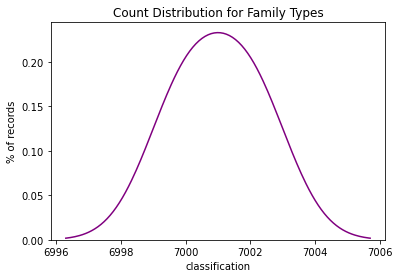

['human' 'virus']
14002 is the number of records in the final filtered dataset


In [2]:
model_f=pd.read_csv('D:/jupyter_notebook/TAPE training/human_virus2.csv')

model_f

print('%d is the number of rows in the joined dataset' %model_f.shape[0])

# Check NA counts
model_f.isnull().sum()

# Drop rows with missing values
model_f = model_f.dropna()
print('%d is the number of proteins that have a classification and sequence' %model_f.shape[0])

# Look at classification type counts
counts = model_f.classification.value_counts()
print(counts)

#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

# Get classification types where counts are over 1000
types = np.asarray(counts[(counts > 1)].index)

# Filter dataset's records for classification types > 1000
data = model_f[model_f.classification.isin(types)]

print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

In [3]:
types

array(['human', 'virus'], dtype=object)

# 3). ----- Train Test Split -----

In [4]:
# Split Data
X_train, X_test,y_train,y_test = train_test_split(data['sequence'], data['classification'], test_size = 0.2, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (1,1))

# Fit and Transform CountVectorizer
vect.fit(X_train)

X_train_df = vect.transform(X_train)

X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'y']


# 4). ------ Machine Learning Models ------

0.7168868261335237
0.8043555872902535
              precision    recall  f1-score   support

       human       0.73      0.69      0.71      1398
       virus       0.71      0.74      0.72      1403

    accuracy                           0.72      2801
   macro avg       0.72      0.72      0.72      2801
weighted avg       0.72      0.72      0.72      2801

{'MultinomialNB': 0.7168868261335237, 'Adaboost': 0.8043555872902535, 'LinearSVC': 0.7875758657622278}


C:\Users\racoon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


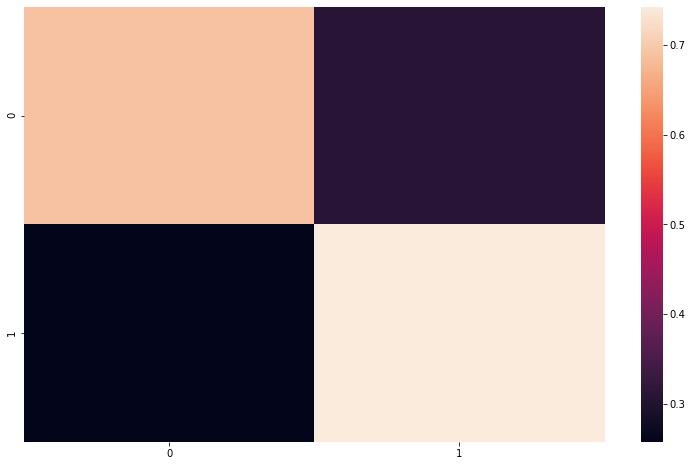

In [5]:
# Make a prediction dictionary to store accuracys
prediction = dict()

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_df, y_train)

NB_pred = model.predict(X_test_df)

NB_pred

prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)

print( prediction['MultinomialNB'])

# Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

model.fit(X_train_df,y_train)

ADA_pred = model.predict(X_test_df)

prediction["Adaboost"] = accuracy_score(ADA_pred , y_test)

print(prediction["Adaboost"])

# 5). ----- Plot Confusion Matrix for NB -----

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, NB_pred, labels = types)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

#Print F1 score metrics
print(classification_report(y_test, NB_pred, target_names = types))

#SVM

from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train_df,y_train)

svm_pred = model.predict(X_test_df)

prediction["LinearSVC"] = accuracy_score(svm_pred, y_test)

print(prediction)

In [8]:
type(types)

numpy.ndarray

#SVM分析模型可视化

In [167]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

predict AAV

In [265]:
test_aav=pd.read_csv('D:/jupyter_notebook/TAPE training/test_aav.csv')

In [270]:
test_aav=test_aav["sequence"]

In [271]:
test_aav

0      DGYLPDWLEDNLSEGIREWW
1      IREWWDLKPGAPKPKANQQK
2      ANQQKQDDGRGLVLPGYKYL
3      DAAALEHDKAYDQQLKAGDN
4      KAGDNPYLRYNHADAEFQER
               ...         
797    GKQNAARDNADYSDVMLTSE
798    KNTPVPADPPTTFNQSKLNS
799    TQYSTGQVSVEIEWELQKEN
800    LQKENSKRWNPEIQYTSNYY
801    NTEGVYSEPHPIGTRYLTRP
Name: sequence, Length: 802, dtype: object

In [275]:
test_aav_df = vect.transform(test_aav)

In [276]:
test_aav_df

<802x128578 sparse matrix of type '<class 'numpy.int64'>'
	with 13925 stored elements in Compressed Sparse Row format>

In [281]:
svm_pred_aav = model.predict(test_aav_df)

In [285]:
np.savetxt("D:/jupyter_notebook/TAPE training/aav_peptide_predict_svm.csv",svm_pred_aav, delimiter=",")

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [287]:
np.savetxt(r'D:/jupyter_notebook/TAPE training/aav_peptide_predict_svm.csv',svm_pred_aav,delimiter=',', fmt=('%s, %f'))

ValueError: fmt has wrong number of % formats:  %s, %f

In [289]:
svm_pred_aav=pd.DataFrame(svm_pred_aav)

In [291]:
svm_pred_aav.to_csv("D:/jupyter_notebook/TAPE training/aav_peptide_predict_svm.csv")